In [154]:
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def plot_loss_curve(loss_curve):
        plt.plot(list(range(len(loss_curve))), loss_curve)
        plt.show()

In [156]:
class LeastSquaresContainer(nn.Module):
    def __init__(self, n):
        super().__init__()
        x = th.tensor(np.random.random(n), dtype=th.float32)
        self.x = nn.Parameter(x)
    
    def loss(self, E, d):
        return loss_function(E, self.x, d)

In [157]:
def loss_function(E, x, d):
    return (th.norm(E@x -d))**2
    
def least_squares_approx(E, d, lr=0.01, epochs=200):
    m, n = E.shape
    estimator = LeastSquaresContainer(n)
    loss_curve= []
    optimizer = optim.SGD(estimator.parameters(), lr=0.00001)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss=estimator.loss(E,d)
        loss.backward()
        loss_curve.append(loss.item())
        optimizer.step()
    plot_loss_curve(loss_curve)
    return estimator

In [159]:
E = np.load("E.npy")
d = np.load("d.npy")
E = th.tensor(E, dtype=th.float32)
d = th.tensor(d, dtype=th.float64) 

print('E is :\n{}\n d is :\n{}'.format(E,d))
print('E\'s shape is {}'.format(E.shape))
print('d\'s shape is {}'.format(d.shape))

E is :
tensor([[1., 1., 1.,  ..., 1., 1., 0.],
        [1., 1., 1.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 1., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 1., 1.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
 d is :
tensor([6.1646, 5.3852, 5.0090,  ..., 5.5125, 4.8667, 7.6771],
       dtype=torch.float64)
E's shape is torch.Size([5000, 20])
d's shape is torch.Size([5000])


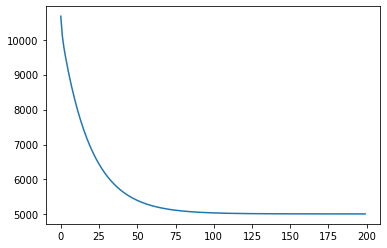

In [153]:
estimator = least_squares_approx(E, d)

In [147]:
print(estimator.x)

Parameter containing:
tensor([ 0.0807,  0.6998,  0.4636,  0.2725,  0.7146,  0.9155,  0.9129, -0.0281,
         0.3251,  0.6066,  0.8267,  0.9397,  0.8521,  0.7032,  0.1249,  0.4521,
         0.8148,  0.1311,  0.2461,  0.6994], requires_grad=True)
